# Apply PyTorch on Fashion MNIST Using ReLU, Sigmoid, Tanh

<h3><center> <font color='maroon'> Upvote , if it helps you :-) </center></font> </h3>

In [4]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

import warnings
warnings.filterwarnings('ignore')

# Neural Network Module and Training Function

# 1 - Class with Sigmoid

In [5]:
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

# 2 - Class with the Tanh

In [6]:
class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

# 3 - Class with ReLU

In [7]:
class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Define a function to train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data

In [8]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_loader))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

Load the training dataset by setting the parameters train to True and convert it to a tensor by placing a transform object int the argument transform

In [9]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.58MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 132kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.37MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 26.4MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Load the testing dataset by setting the parameters train to False and convert it to a tensor by placing a transform object int the argument transform

In [10]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
validation_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

In [11]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [12]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

In [13]:
len(train_set)

60000

9


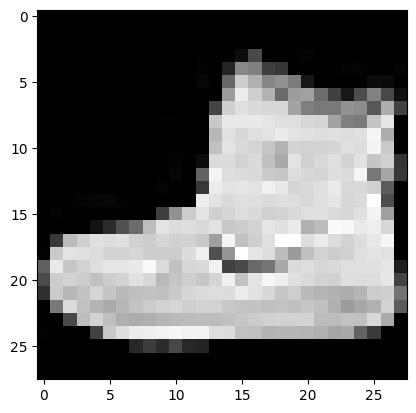

In [14]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [15]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

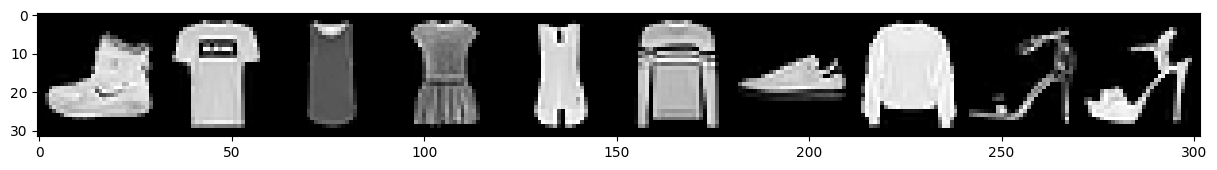

In [16]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

In [17]:
criterion = nn.CrossEntropyLoss()

# Define Neural Network, Criterion function, Optimizer and Train the Model

In [18]:
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [19]:
cust_epochs = 10

# Training for Sigmoid Function

In [20]:
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [21]:
print(training_results)

{'training_loss': [2.2856931686401367, 2.3531198501586914, 2.3126060962677, 2.332918882369995, 2.323221445083618, 2.315739393234253, 2.346623182296753, 2.330744981765747, 2.3099260330200195, 2.3173160552978516, 2.293764114379883, 2.3168158531188965, 2.2999556064605713, 2.3167755603790283, 2.2974727153778076, 2.3077945709228516, 2.314868211746216, 2.3055853843688965, 2.3021039962768555, 2.311814785003662, 2.3177597522735596, 2.2921581268310547, 2.33575701713562, 2.293968915939331, 2.3013737201690674, 2.3173792362213135, 2.322148323059082, 2.3168070316314697, 2.306607723236084, 2.3058841228485107, 2.2913644313812256, 2.3077945709228516, 2.298543930053711, 2.322174549102783, 2.3030147552490234, 2.302851915359497, 2.3191378116607666, 2.3010239601135254, 2.3167853355407715, 2.293464422225952, 2.308589220046997, 2.317986249923706, 2.314570188522339, 2.305392026901245, 2.2964813709259033, 2.3199195861816406, 2.2936272621154785, 2.3055901527404785, 2.308201789855957, 2.295849561691284, 2.29396

# Training fro ReLu Function

In [22]:
learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

# Training fro Tanh Function

In [23]:
learning_rate = 0.01
modelTanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_tanh = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

# Analyzing Results

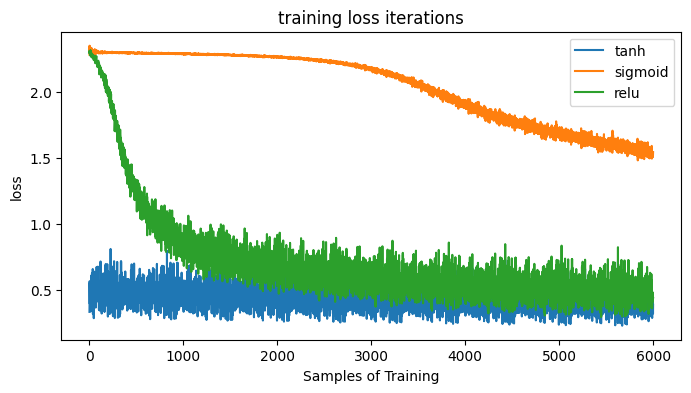

In [24]:
plt.figure(figsize=(8,4))
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.xlabel('Samples of Training')
plt.title('training loss iterations')
plt.legend()
plt.show()

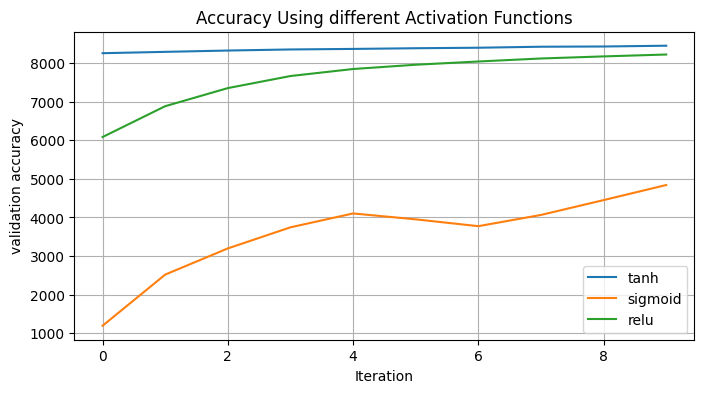

In [25]:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(training_results_tanh['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.title('Accuracy Using different Activation Functions')
plt.xlabel('Iteration')   
plt.legend()
plt.show()

<h3><center> <font color='maroon'> Upvote , if it helps you :-) </center></font> </h3>